## Домашнее задание №1

В этом домашнем задании вы познакомитесь с pytorch сами и сможете попрактиковаться в его применении. 

#### План:

1. Простейшие операции в pytorch
2. Пишем Adam и применяем его к ручной модели
3. Обучаем свою первую нейросеть

In [5]:
import os
import sys
import math
import torch
import random
import numpy as np
from tqdm import tqdm_notebook as tqdm
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms

plt.style.use('ggplot')
device = 'cuda'

In [6]:
torch.cuda.is_available()

True

### Простейшие операции на pytorch (2 балла)

**Task**: Cоздайте два случайных тензора (двумерных, не квадратных):

In [ ]:
x = torch.randn(10, 2)
y = torch.randn(2, 13)

In [ ]:
x.mm(y)

tensor([[-6.6559e-01,  7.5990e-01,  8.2056e-01, -7.4306e-01, -1.0186e+00,
          1.2420e+00,  8.5717e-01, -9.1479e-01, -1.0280e+00, -3.2370e+00,
         -1.5813e+00, -5.4043e-01, -1.3259e+00],
        [ 5.8470e-01,  1.8944e+00, -2.9270e+00, -1.0797e+00, -7.8541e-01,
         -9.1057e-01, -1.3028e+00, -4.7037e-01,  3.1130e-01,  4.6223e-01,
         -1.9148e+00,  5.0689e-02, -1.4398e+00],
        [ 9.9179e-02, -1.5556e+00,  1.1199e+00,  1.0861e+00,  1.0977e+00,
         -2.8670e-01,  1.8184e-01,  8.5357e-01,  4.8633e-01,  1.8231e+00,
          2.0958e+00,  3.1928e-01,  1.6640e+00],
        [ 2.5990e-01,  1.8119e+00, -2.1363e+00, -1.1358e+00, -9.8518e-01,
         -3.3642e-01, -7.8727e-01, -6.9136e-01, -8.5640e-02, -6.9605e-01,
         -2.1019e+00, -1.3800e-01, -1.6260e+00],
        [-5.2992e-01,  4.5378e-01,  7.8353e-01, -4.8934e-01, -7.1177e-01,
          9.7820e-01,  7.1491e-01, -6.5312e-01, -7.8351e-01, -2.4366e+00,
         -1.0640e+00, -4.0524e-01, -9.0189e-01],
        [-4.872

**Task**: Умножьте их друг на друга, результат запишите в третий тензор без использования оператора `=`, для создания третьего тензора предлагается использовать `torch.empty`:

In [ ]:
z = torch.empty(10, 13)
z.add(x.mm(y))
z.shape

torch.Size([10, 13])

**Task**: Реализуйте ReLU использую только pytorch, примените его к тензору `x` (запрещено использование модулей torch.nn и его подмодулей, а также функции torch.relu)

In [ ]:
def relu_forward(x):
  x = x*torch.tensor(x>0).int()
  
  return x

assert torch.all(F.relu(x) == relu_forward(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


In [ ]:
(x>0).int()

tensor([[1, 0],
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [1, 1]], dtype=torch.int32)

**Task**: Сделайте тоже самое c ELU (запрещено использование модулей torch.nn и его подмодулей):

In [ ]:
def elu_forward(x):
  x = x*torch.tensor(x>0).int() +  (torch.exp(x) - 1) * torch.tensor(x<=0).int()
  
  return x


assert torch.allclose(
    F.elu(x),
    elu_forward(x), 
    1e-4
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


**Task**: LeakyReLU (запрещено использование модулей torch.nn и его подмодулей):

In [ ]:
def lrelu_forward(x, alpha):
  x = x * (alpha*x < x).int() + alpha*x * (alpha*x > x).int()
  
  return x


assert torch.all(F.leaky_relu(x, 0.01) == lrelu_forward(x, 0.01))

**Task**: Теперь перейдем к немного более современным функциям активаций, например Mish, напомним как она выглядит:

$$x * tanh(ln(1+e^x))$$

(запрещено использование модулей torch.nn и его подмодулей)

In [ ]:
def mish(x):
  x = x * torch.tanh(torch.log(1 + torch.exp(x)))

  return x

In [ ]:
assert torch.allclose(
    mish(torch.tensor([1, 1, 1], dtype=torch.float32)), 
    torch.tensor([0.8651, 0.8651, 0.8651]), 
    atol=1e-4
)

assert torch.allclose(
    mish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)), 
    torch.tensor([0.5014, 0.2908, 0.5280, 0.2663], dtype=torch.float64), 
    atol=1e-4
)

**Task**: Теперь реализуем swish, напомним как она выглядит:

$$x * \sigma(x)$$

(запрещено использование модулей torch.nn и его подмодулей)

In [ ]:
def swish(x):
  x = x * torch.sigmoid(x)

  return x

In [ ]:
assert torch.allclose(
    swish(torch.tensor([1, 1, 1], dtype=torch.float32)), 
    torch.tensor([0.7311, 0.7311, 0.7311]), 
    atol=1e-4
)

assert torch.allclose(
    swish(torch.tensor([0.6376, 0.4021, 0.6656, 0.3726], dtype=torch.float64)), 
    torch.tensor([0.4171, 0.2409, 0.4396, 0.2206], dtype=torch.float64), 
    atol=1e-4
)

### Пишем Adam и применяем его к логистической регрессии (4 балла)


В данной секции вам нужно сделать две вещи: 

1. Написать свой собственный оптимизатор подобно тому, который мы писали на семинаре
2. Обучить логистическую регрессию побатчево на картинках из датасета 


#### Adam


$$
\begin{eqnarray}
g &=& \frac{1}{m}\nabla_w \sum_i L(f(x_{i};w), y_{i}) \\
m &=& \beta_1 m + (1 - \beta_1) g \\
v &=& \beta_2 v + (1 - \beta_2) diag(gg^{T}) \\
\hat{m} &=& \frac{m}{1 - \beta_1^{t}} \\
\hat{v} &=& \frac{v}{1 - \beta_2^{t}} \\
w &=& w - \frac{\eta}{\sqrt{\hat{v} + \epsilon}} \odot \hat{m}
\end{eqnarray}
$$

In [7]:
# абстрактный класс, не обращайте внимания
from torch.optim import Optimizer


class InClassOptimizer(Optimizer):
    def step(self):
        """Perform single optimization step."""
        with torch.no_grad(): # выключим градиенты
            for group in self.param_groups:
                self._group_step(group)

    def _group_step(self, group):
        # group ~ dict[str, ...]
        """
        Private helper function to perform
        single optimization step on model parameters.
        """
        raise NotImplementedError()

**Task**: Напишите свою реализацию Adam:

In [8]:
class Adam(InClassOptimizer):
    def __init__(self, params, lr=0.001, eps=1e-13, beta_1=0.9, beta_2=0.999):
        defaults = dict(lr=lr, eps=eps, beta_1=beta_1, beta_2=beta_2)
        super().__init__(params, defaults)

    def _group_step(self, group):
        # One group contains information about values passed in init
        # and model parameters to update
        lr = group['lr']
        eps = group['eps']
        beta_1 = group['beta_1']
        beta_2 = group['beta_2']
        
        for param in filter(lambda x: x.grad is not None, group['params']):

            self._init_adam_buffer(param)
            d_param = param.grad
            v, m, t = self._get_adam_buffer(param)
            torch.add(beta_1*m, (1 - beta_1) * d_param, out=m)
            hat_m = m / (1 - beta_1 ** t)
            torch.add(beta_2*v, (1 - beta_2) * d_param**2, out=v)
            hat_v = v / (1 - beta_2 ** t)
            param.add_(hat_m/torch.sqrt(hat_v + eps), alpha=-lr)
            
            pass

    def _get_adam_buffer(self, param):
        """
        Get accumulated gradients for Adam.

        Parameters
        ----------
        param : `torch.Tensor`, required
            Model parameter to get accumulated gradeints for Adagrad.

        Returns
        -------
        Accumulated Adam gradients for parameter.
        """
        param_st = self.state[param]
        param_st['adam_t'] += 1
        return param_st['adam_buffer'], param_st['adam_m'], param_st['adam_t']

    def _init_adam_buffer(self, param):
        """
        Initialize accumulated gradeints for adam.

        Parameters
        ----------
        param : `torch.Tensor`, required
            Model parameter to get accumulated gradeints for adam.
        """
        param_st = self.state[param]
        if 'adam_buffer' not in param_st:
            param_st['adam_buffer'] = torch.zeros_like(param)
        if 'adam_m' not in param_st:
            param_st['adam_m'] = torch.zeros_like(param)
        if 'adam_t' not in param_st:
            param_st['adam_t'] = 0
        pass


In [9]:
# проверим теперь, правильно ли работает самодельный Адам

In [10]:
from sklearn.datasets import make_regression

def seed_everything(seed):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

X, y = map(
    lambda x: torch.from_numpy(x).float(),
    make_regression(n_samples=200, n_features=2)
)

def get_model():
    seed_everything(13)
    return torch.nn.Sequential(
        torch.nn.Linear(2, 10),
        torch.nn.Linear(10, 1)
    )

In [11]:
def check_optimizer(model, optim, num_iter):
    loss = torch.nn.MSELoss()
    for i in range(num_iter):
        output = loss(model(X), y.unsqueeze(-1))
        output.backward()
        optim.step()
        optim.zero_grad()
        if i % 100 == 0:
            print(f'Iteration {i} loss:', output.item())

In [12]:
model = get_model()
optim = Adam(model.parameters(), lr=0.005)
check_optimizer(model, optim, num_iter=1001)

Iteration 0 loss: 1583.11767578125
Iteration 100 loss: 1218.565185546875
Iteration 200 loss: 438.6893005371094
Iteration 300 loss: 34.65418243408203
Iteration 400 loss: 0.3573785424232483
Iteration 500 loss: 0.000606690940912813
Iteration 600 loss: 1.479176603425003e-07
Iteration 700 loss: 1.8749168884113487e-09
Iteration 800 loss: 1.8815997648857774e-09
Iteration 900 loss: 1.8815997648857774e-09
Iteration 1000 loss: 1.8815997648857774e-09


In [13]:
model = get_model()
optim = torch.optim.Adam(model.parameters(), lr=0.005)
check_optimizer(model, optim, num_iter=1001)

Iteration 0 loss: 1583.11767578125
Iteration 100 loss: 1218.565185546875
Iteration 200 loss: 438.6891784667969
Iteration 300 loss: 34.65415954589844
Iteration 400 loss: 0.3573779761791229
Iteration 500 loss: 0.0006066903006285429
Iteration 600 loss: 1.4809191384301812e-07
Iteration 700 loss: 1.867049403969645e-09
Iteration 800 loss: 1.8625382347536856e-09
Iteration 900 loss: 1.8706465265694305e-09
Iteration 1000 loss: 1.867049403969645e-09


**Task**: Создайте параметры для обучения логистической регрессии, сделаем Xavier ициализацию, которая выглядит следующим образом: 

$$w \sim U[-\frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}, \frac{\sqrt{6}}{\sqrt{n_{in} + n_{out}}}]$$

где: 

* $n_{in}$ -- размер входа (в нейронах) 
* $n_{out}$ -- размер выхода (в нейронах)

Подумайте над выбором $n_{in}$ и $n_{out}$ самостоятельно. 

In [14]:
n_in = 28*28
n_out = 10
weights = (-2*np.sqrt(6/(n_in + n_out)) * torch.rand(size=(n_in, n_out)) + np.sqrt(6/(n_in + n_out))).requires_grad_()
intercept = torch.zeros(10, requires_grad=True)

In [15]:
optimizer = Adam([weights, intercept], lr=0.005)
loss = nn.CrossEntropyLoss()

Загрузим данные и создадим даталоадеры:

In [16]:
fashion_mnist_train = torchvision.datasets.FashionMNIST(
    './data',
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)
train_dataloader = DataLoader(
    fashion_mnist_train, batch_size=32, shuffle=True, num_workers=2
)
fashion_mnist_eval = torchvision.datasets.FashionMNIST(
    './data',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)

eval_dataloader = DataLoader(
    fashion_mnist_eval, batch_size=32, num_workers=2
)

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Напишите функцию для тренировки логистической регрессии, она должна: 
    * Делать предсказания 
    * Считать лосс 
    * Подсчитывать градиенты
    * Делать шаг оптимизации
    * Обнулять посчитанные градиенты
    * Считать метрики 
    * Возвращать полученные метрики
    
После этого предусмотрите возможность визуализировать метрики, чтобы нарисовать картинки, а именно от вас требуется визуализировать: 

    * Зависимость лосса от количества итераций
    * Зависимость доли правильных ответов от количества итераций

In [17]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, X, bias, weights):
        super(LogisticRegressionModel, self).__init__()
        self.linear = bias + X @ weights 

    def forward(self):
        out = torch.sigmoid(self.linear)
        return out

In [18]:
def get_train_metrics(y_pred, y, loss):
    loss_batch = loss.item()
    accuracy_batch = (torch.argmax(y_pred, dim=-1) == y).numpy().tolist()
    return loss_batch, accuracy_batch


In [19]:
def train_logistic_regression(weights, bias, batch, loss, optimizer):
    X = batch[0]
    y = batch[1]

    X = X.view(-1, 28*28).requires_grad_()
    model = LogisticRegressionModel(X, bias, weights)

    y_pred = model()

    output = loss(y_pred, y)
    output.backward()
    optimizer.step()
    optimizer.zero_grad()

    return get_train_metrics(y_pred, y, output)

In [20]:
bias = intercept

val_loss = []
val_accuracy = []

train_loss = []
train_accuracy = []

for epoch in tqdm(range(1, 100)):
    for batch in train_dataloader:
        metrics = train_logistic_regression(weights, bias, batch, loss, optimizer)

        train_loss.append(metrics[0])
        train_accuracy.append(np.mean(metrics[1]))

    val_loss_epoch = []
    val_accuracy_epoch = []
    with torch.no_grad(): 
        for X_val, y_val in eval_dataloader:
            X_val = X_val.view(-1, 28*28)

            model = LogisticRegressionModel(X_val, bias, weights)
            y_pred_val = model() # делаем предсказания
            l = loss(y_pred_val, y_val) # считаем лосс
            val_loss_epoch.append(l.numpy()) # добавляем в массив 
            val_accuracy_epoch.extend((torch.argmax(y_pred_val, dim=-1) == y_val).numpy().tolist())

    val_loss.append(np.mean(val_loss_epoch))
    val_accuracy.append(np.mean(val_accuracy_epoch))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


Text(0, 0.5, 'loss')

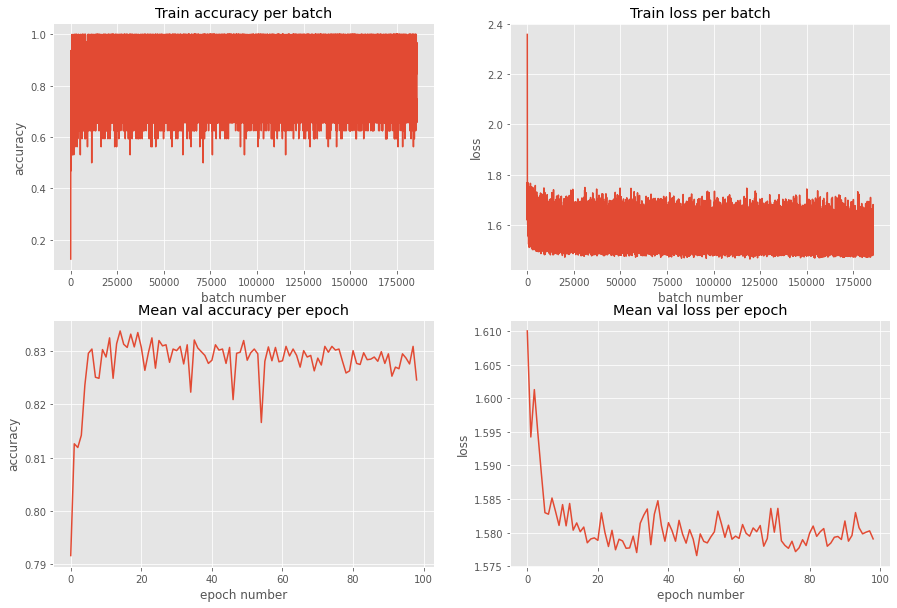

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))


ax[0, 0].plot(train_accuracy)
ax[0, 0].set_title('Train accuracy per batch')
ax[0, 0].set_xlabel('batch number')
ax[0, 0].set_ylabel('accuracy')

ax[0, 1].plot(train_loss)
ax[0, 1].set_title('Train loss per batch')
ax[0, 1].set_xlabel('batch number')
ax[0, 1].set_ylabel('loss')


ax[1, 0].plot(val_accuracy)
ax[1, 0].set_title('Mean val accuracy per epoch')
ax[1, 0].set_xlabel('epoch number')
ax[1, 0].set_ylabel('accuracy')

ax[1, 1].plot(val_loss)
ax[1, 1].set_title('Mean val loss per epoch')
ax[1, 1].set_xlabel('epoch number')
ax[1, 1].set_ylabel('loss')

#### Вопросы к секции: 

* Своими словами и без математики объясните благодаря чему Adam дает несмещенную оценку на квадрат градиента
* Когда модель начала переобучаться? Как вы это поняли? Сделайте визуализацию и докажите свою точку зрения.

Ответы:

1.   Адам дает несмещенною оценку, так как исправляет смещенее, возникающее при инициаизации скользящего среднего нулями
2.    Как видно из картиночек, где-то с 10 эпохи, доля правильных ответов и лосс перестают сильно меняться и колеблются в определенно диапазоне, отсюда можно сделать вывод, что переобучение не произойдет, но и смысла в излишнем количестве эпох нет



### Моя первая нейросеть (4 балла)

В данной секции вам нужно сделать следующие вещи: 

* Реализовать три разных архитектуры нейросетей. Эти архитектуры должны принципиально отличаться друг от друга. Разрешается одной из архитекур брать полностью полносвязную модель. Остальные две должны быть сверточными и сильно отличаться друг от друга. К примеру, одна из таких архитектур может быть VGG подобная сеть, а другая ResNet подобная архитектура. 

* Написать цикл для обучения которым можно обучать все три модели без изменений кода

* Попробовать каждую модель с двумя оптимизаторами: RMSprop и SGD with momentum

* Визуализировать результаты перфоманса каждой модели (две метрики минимум для каждого сетапа, например, лосс и долю правильных ответов). В данном пункте мы ждем от вас визуализацию зависимости метрики от номера итерации обучения.

* Сделать выводы какие были модели были лучше и как вы думаете почему?

###  Функции обучения и визуализации

In [22]:
def visualize(n, loss_sgd, accuracy_sgd, loss_rms, accuracy_rms, iter):
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Model {n}, metrics', fontsize=20)

    ax[0, 0].plot(iter, accuracy_sgd)
    ax[0, 0].set_title('Validation accuracy, SGD')
    ax[0, 0].set_xlabel('iteration')
    ax[0, 0].set_ylabel('accuracy')

    ax[0, 1].plot(iter, loss_sgd)
    ax[0, 1].set_title('Validation loss, SGD')
    ax[0, 1].set_xlabel('iteration')
    ax[0, 1].set_ylabel('loss')

    ax[1, 0].plot(iter, accuracy_rms)
    ax[1, 0].set_title('Validation accuracy, RMSprop')
    ax[1, 0].set_xlabel('iteration')
    ax[1, 0].set_ylabel('accuracy')

    ax[1, 1].plot(iter, loss_rms)
    ax[1, 1].set_title('Validation loss, RMSprop')
    ax[1, 1].set_xlabel('iteration')
    ax[1, 1].set_ylabel('loss')

    return plt.show()

In [23]:
def train_model(model, epoch_n, train_dataloader, eval_dataloader, optimizer):
    iter = 0
    val_loss = []
    val_accuracy = []
    iterations = []

    for epoch in tqdm(range(1, epoch_n)):
        for X, y in train_dataloader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            loss = nn.CrossEntropyLoss()(y_pred, y)
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            iter += 1

        val_loss_epoch = []
        val_accuracy_epoch = []

        with torch.no_grad():
            for X_val, y_val in eval_dataloader:
                X_val, y_val = X_val.to(device), y_val.to(device)

                y_pred_val = model(X_val) # делаем предсказания
                loss_val = nn.CrossEntropyLoss()(y_pred_val, y_val) # считаем лосс
                val_loss_epoch.append(loss_val.cpu().numpy()) # добавляем в массив 
                val_accuracy_epoch.extend((torch.argmax(y_pred_val, dim=-1) == y_val).cpu().numpy().tolist())

        val_loss.append(np.mean(val_loss_epoch))
        val_accuracy.append(np.mean(val_accuracy_epoch))
        iterations.append(iter)
        print(f'loss: {np.mean(val_loss_epoch)}')
        print(f'accuracy: {np.mean(val_accuracy_epoch)}')
    
    return val_loss, val_accuracy, iterations

In [24]:
# Оказалась не нужна, тк утром cuda заработал

# эта функция нужна исключительно для того, чтобы применить ее к третьей модели, тк под конец колаб отказался выполнять функцию .to('cuda') 
# а я не хотела перезапускать первые две модели на cpu :)
def train_third_model(model, epoch_n, train_dataloader, eval_dataloader, optimizer):
    iter = 0
    val_loss = []
    val_accuracy = []
    iterations = []

    for epoch in tqdm(range(1, epoch_n)):
        for X, y in train_dataloader:
            X, y = X.to('cpu'), y.to('cpu')
            y_pred = model(X)

            loss = nn.CrossEntropyLoss()(y_pred, y)
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            iter += 1

            if iter % 1000 == 0:
                print(loss.item(), iter)
        val_loss_epoch = []
        val_accuracy_epoch = []

        with torch.no_grad():
            for X_val, y_val in eval_dataloader:
                X_val, y_val = X_val.to('cpu'), y_val.to('cpu')

                y_pred_val = model(X_val) # делаем предсказания
                loss_val = nn.CrossEntropyLoss()(y_pred_val, y_val) # считаем лосс
                val_loss_epoch.append(loss_val.cpu().numpy()) # добавляем в массив 
                val_accuracy_epoch.extend((torch.argmax(y_pred_val, dim=-1) == y_val).cpu().numpy().tolist())

        val_loss.append(np.mean(val_loss_epoch))
        val_accuracy.append(np.mean(val_accuracy_epoch))
        iterations.append(iter)
        print(f'loss: {np.mean(val_loss_epoch)}')
        print(f'accuracy: {np.mean(val_accuracy_epoch)}')
    
    return val_loss, val_accuracy, iterations

### Model 1 (FC)

#### Код

In [25]:
class FirstModel(nn.Module):
    def __init__(self, dropout=0.4):
        super(FirstModel, self).__init__()
        self.batch_norm = torch.nn.BatchNorm2d(1)
        self.linear1 = torch.nn.Linear(in_features=28*28, out_features=128)
        self.linear2 = torch.nn.Linear(in_features=128, out_features=64)
        
        self.output = torch.nn.Linear(in_features=64, out_features=10)
        self.dropout = torch.nn.Dropout(p=dropout)
        pass

    def forward(self, x):
        x = self.batch_norm(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.linear1(x))
        x = self.dropout(x)
        x = F.relu(self.linear2(x))
        return self.output(x)
        pass
  
first_m = FirstModel()
first_m.to(device)

FirstModel(
  (batch_norm): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)

In [26]:
loss_sgd_1, accuracy_sgd_1, iter_1 = train_model(first_m, 50, train_dataloader, eval_dataloader, torch.optim.SGD(first_m.parameters(), lr=0.01))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


loss: 0.5306215286254883
accuracy: 0.8112
loss: 0.47111624479293823
accuracy: 0.8281
loss: 0.46018216013908386
accuracy: 0.8306
loss: 0.4293695092201233
accuracy: 0.8455
loss: 0.4238625466823578
accuracy: 0.8494
loss: 0.41230690479278564
accuracy: 0.8546
loss: 0.40843379497528076
accuracy: 0.8519
loss: 0.4015808403491974
accuracy: 0.8554
loss: 0.410896897315979
accuracy: 0.8555
loss: 0.40527185797691345
accuracy: 0.8577
loss: 0.39067140221595764
accuracy: 0.8629
loss: 0.3901403546333313
accuracy: 0.8651
loss: 0.38680902123451233
accuracy: 0.8656
loss: 0.38306093215942383
accuracy: 0.866
loss: 0.38177651166915894
accuracy: 0.8621
loss: 0.4013439416885376
accuracy: 0.8642
loss: 0.3811213970184326
accuracy: 0.869
loss: 0.38031071424484253
accuracy: 0.8653
loss: 0.3764103353023529
accuracy: 0.8692
loss: 0.39136654138565063
accuracy: 0.8631
loss: 0.39372071623802185
accuracy: 0.8626
loss: 0.38988688588142395
accuracy: 0.8687
loss: 0.37589022517204285
accuracy: 0.8701
loss: 0.393861025571823

In [27]:
loss_rms_1, accuracy_rms_1, iter_1 = train_model(first_m, 50, train_dataloader, eval_dataloader, torch.optim.RMSprop(first_m.parameters(), lr=0.001))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


loss: 0.49239516258239746
accuracy: 0.8364
loss: 0.45310845971107483
accuracy: 0.839
loss: 0.4413226842880249
accuracy: 0.8435
loss: 0.4295901954174042
accuracy: 0.8497
loss: 0.4044223129749298
accuracy: 0.86
loss: 0.4113730490207672
accuracy: 0.8577
loss: 0.4019555151462555
accuracy: 0.862
loss: 0.39552605152130127
accuracy: 0.8613
loss: 0.40551257133483887
accuracy: 0.8608
loss: 0.38919809460639954
accuracy: 0.862
loss: 0.3752514123916626
accuracy: 0.8665
loss: 0.3804740905761719
accuracy: 0.8675
loss: 0.3816320598125458
accuracy: 0.8665
loss: 0.3767004609107971
accuracy: 0.8677
loss: 0.387208491563797
accuracy: 0.8689
loss: 0.37620267271995544
accuracy: 0.8725
loss: 0.37297260761260986
accuracy: 0.869
loss: 0.3847111165523529
accuracy: 0.8712
loss: 0.38029083609580994
accuracy: 0.8659
loss: 0.3849310576915741
accuracy: 0.8691
loss: 0.3828638792037964
accuracy: 0.8754
loss: 0.3657456636428833
accuracy: 0.8768
loss: 0.3722062110900879
accuracy: 0.8789
loss: 0.3755735456943512
accuracy

#### Визуализация метрик

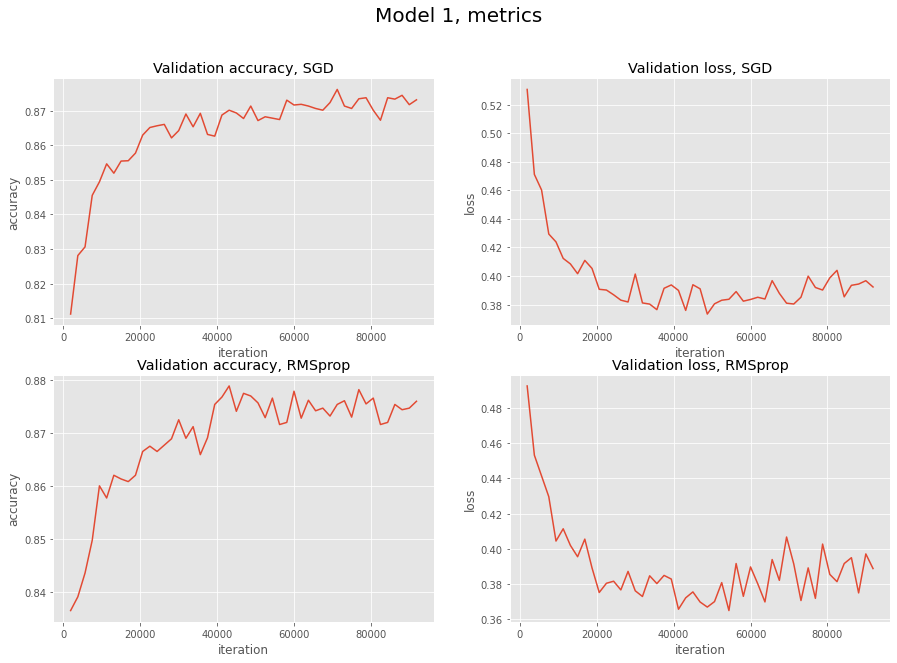

In [28]:
visualize(1, loss_sgd_1, accuracy_sgd_1, loss_rms_1, accuracy_rms_1, iter_1)

### Model 2 (VGG-like)

#### Код

In [29]:
second_model = nn.Sequential(
    nn.Conv2d(1, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 32, 3, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Conv2d(32, 64, 3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.Conv2d(64, 64, 3, padding=1),
    nn.BatchNorm2d(64),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Dropout(0.2),

    nn.Flatten(),
    nn.Linear(28*28 * 4, 32),
    nn.BatchNorm1d(32),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(32, 10),
    nn.Softmax()
)
second_model.to(device)

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Dropout(p=0.2, inplace=False)
  (8): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Dropout(p=0.2, inplace=False)
  (16): Flatten()
  (17): Linear(in_features=3136

In [30]:
loss_sgd_2, accuracy_sgd_2, iter_2 = train_model(second_model, 50, train_dataloader, eval_dataloader, torch.optim.SGD(second_model.parameters(), lr=0.005))
print(max(accuracy_sgd_2))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


loss: 1.9512604475021362
accuracy: 0.649
loss: 1.8471494913101196
accuracy: 0.7033
loss: 1.7959682941436768
accuracy: 0.7302
loss: 1.763710856437683
accuracy: 0.7527
loss: 1.742451548576355
accuracy: 0.7657
loss: 1.7286419868469238
accuracy: 0.7732
loss: 1.715233564376831
accuracy: 0.7831
loss: 1.7110049724578857
accuracy: 0.7845
loss: 1.6969969272613525
accuracy: 0.7936
loss: 1.695618987083435
accuracy: 0.7927
loss: 1.6919304132461548
accuracy: 0.7952
loss: 1.6883833408355713
accuracy: 0.7961
loss: 1.6819214820861816
accuracy: 0.8017
loss: 1.6798022985458374
accuracy: 0.8005
loss: 1.671572208404541
accuracy: 0.8063
loss: 1.6763023138046265
accuracy: 0.8011
loss: 1.6725043058395386
accuracy: 0.8065
loss: 1.6673012971878052
accuracy: 0.8118
loss: 1.6648415327072144
accuracy: 0.8135
loss: 1.6673678159713745
accuracy: 0.8105
loss: 1.6643636226654053
accuracy: 0.8105
loss: 1.6605126857757568
accuracy: 0.8154
loss: 1.6569358110427856
accuracy: 0.8179
loss: 1.6558613777160645
accuracy: 0.819

In [31]:
loss_rms_2, accuracy_rms_2, iter_2 = train_model(second_model, 50, train_dataloader, eval_dataloader, torch.optim.RMSprop(second_model.parameters(), lr=0.01))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


loss: 1.6712355613708496
accuracy: 0.7901
loss: 1.640593409538269
accuracy: 0.8213
loss: 1.6320583820343018
accuracy: 0.8299
loss: 1.6237577199935913
accuracy: 0.8372
loss: 1.6284273862838745
accuracy: 0.8326
loss: 1.6113554239273071
accuracy: 0.8505
loss: 1.6117175817489624
accuracy: 0.8487
loss: 1.6133841276168823
accuracy: 0.8474
loss: 1.6105670928955078
accuracy: 0.85
loss: 1.610711932182312
accuracy: 0.8499
loss: 1.6045072078704834
accuracy: 0.8567
loss: 1.6028233766555786
accuracy: 0.8582
loss: 1.6206378936767578
accuracy: 0.8407
loss: 1.6048613786697388
accuracy: 0.8564
loss: 1.6027462482452393
accuracy: 0.8576
loss: 1.6000621318817139
accuracy: 0.8607
loss: 1.596792221069336
accuracy: 0.8636
loss: 1.6051658391952515
accuracy: 0.8555
loss: 1.5938680171966553
accuracy: 0.8674
loss: 1.5932989120483398
accuracy: 0.8671
loss: 1.5956754684448242
accuracy: 0.8646
loss: 1.6012389659881592
accuracy: 0.86
loss: 1.5918858051300049
accuracy: 0.8692
loss: 1.5955519676208496
accuracy: 0.8653

#### Визуализация метрик

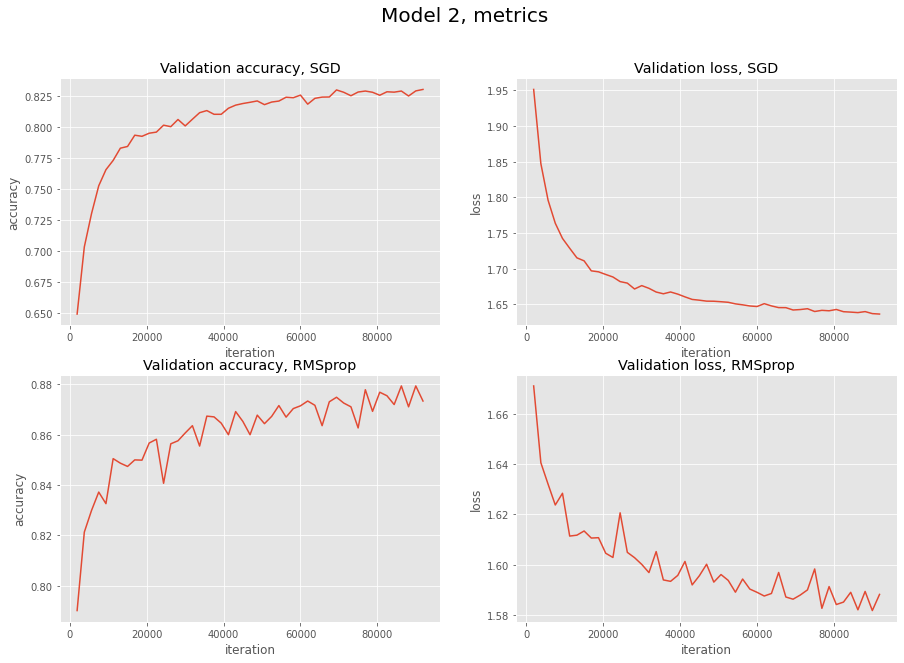

In [32]:
visualize(2, loss_sgd_2, accuracy_sgd_2, loss_rms_2, accuracy_rms_2, iter_2)

### Model 3 (ResNet)

#### Код

In [36]:
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 32
        self.conv = conv3x3(1, 32)
        self.bn = nn.BatchNorm2d(32)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 32, layers[0])
        self.layer2 = self.make_layer(block, 64, layers[1], 2)
        self.avg_pool = nn.AvgPool2d(4)
        self.fc1 = nn.Linear(64*3*3, 32)
        self.fc2 = nn.Linear(32, num_classes)
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)

        return out

In [37]:
third_model = ResNet(ResBlock, [1, 1, 1])
third_model.to(device)

ResNet(
  (conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): ResBlock(
      (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
    )
  )
  (layer2): Sequential(
    (0): ResBlock(
      (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (avg_pool): AvgPoo

In [144]:
loss_sgd_3, accuracy_sgd_3, iter_3 = train_model(third_model, 21, train_dataloader, eval_dataloader, torch.optim.SGD(third_model.parameters(), lr=0.005))
print(max(accuracy_sgd_3))
# тут я выводила еще и train_loss на каждой 1000-й итерации, чтобы убедиться, что модель вообще работает, и понять, как быстро (или скорее долго) она обучается

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


0.6687523126602173 1000
loss: 0.582780659198761
accuracy: 0.7841
0.45382779836654663 2000
0.5565486550331116 3000
loss: 0.4902494251728058
accuracy: 0.8192
0.652513325214386 4000
0.555367648601532 5000
loss: 0.43630290031433105
accuracy: 0.8453
0.3745945990085602 6000
0.2551296651363373 7000
loss: 0.39425238966941833
accuracy: 0.8594
0.5068217515945435 8000
0.2724630534648895 9000
loss: 0.38287296891212463
accuracy: 0.8639
0.11506036669015884 10000
0.2292301207780838 11000
loss: 0.3478911519050598
accuracy: 0.8791
0.3726329207420349 12000
0.2953804135322571 13000
loss: 0.3500225245952606
accuracy: 0.8746
0.21834143996238708 14000
0.3246515095233917 15000
loss: 0.35843977332115173
accuracy: 0.8714
0.32292911410331726 16000
loss: 0.32196044921875
accuracy: 0.885
0.2549991011619568 17000
0.11450644582509995 18000
loss: 0.3317102789878845
accuracy: 0.8809
0.286190003156662 19000
0.1498054563999176 20000
loss: 0.3248406648635864
accuracy: 0.8801
0.6123897433280945 21000
0.24977654218673706 

In [148]:
loss_rms_3, accuracy_rms_3, iter_3 = train_third_model(third_model, 21, train_dataloader, eval_dataloader, torch.optim.RMSprop(third_model.parameters(), lr=0.005))
print(max(accuracy_sgd_3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


0.3976410925388336 1000
loss: 0.3905875086784363
accuracy: 0.86
0.38377293944358826 2000
0.40602919459342957 3000
loss: 0.3258238434791565
accuracy: 0.8777
0.20068219304084778 4000
0.20533102750778198 5000
loss: 0.3061755299568176
accuracy: 0.8891
0.35904034972190857 6000
0.2581119239330292 7000
loss: 0.29930734634399414
accuracy: 0.8927
0.48296067118644714 8000
0.4781169891357422 9000
loss: 0.28658169507980347
accuracy: 0.8985
0.1958743929862976 10000
0.2308647334575653 11000
loss: 0.2914848327636719
accuracy: 0.8943
0.25167471170425415 12000
0.24228572845458984 13000
loss: 0.2850768268108368
accuracy: 0.8997
0.18719178438186646 14000
0.13745325803756714 15000
loss: 0.2889379858970642
accuracy: 0.8989
0.20931196212768555 16000
loss: 0.2792821526527405
accuracy: 0.9048
0.07082612812519073 17000
0.158605694770813 18000
loss: 0.29025688767433167
accuracy: 0.9015
0.16877597570419312 19000
0.21842634677886963 20000
loss: 0.288040429353714
accuracy: 0.9019
0.129038468003273 21000
0.10438486

#### Визуализация метрик

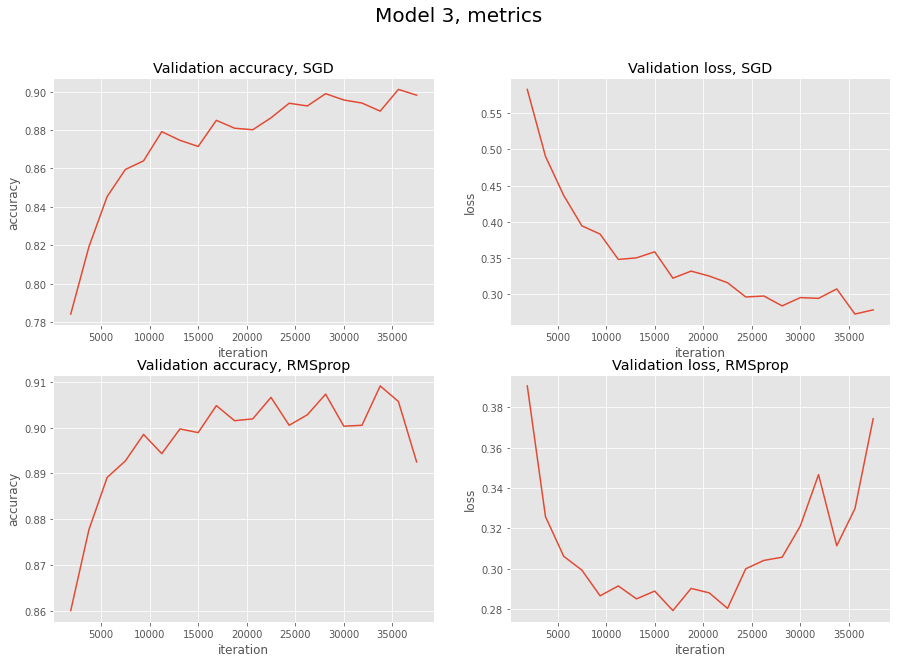

In [149]:
visualize(3, loss_sgd_3, accuracy_sgd_3, loss_rms_3, accuracy_rms_3, iter_3)


### Summary

In [47]:
print('\033[1m' + 'SGD optimizer, best accuracies' + '\033[0m')
print(f'Linear Net: {max(accuracy_sgd_1)}')
print(f'VGG-like Net: {max(accuracy_sgd_2)}')
print(f'ResNet: 0.9011')
print('')
print('\033[1m' + 'RMSprop optimizer, best accuracies:' + '\033[0m')
print(f'Linear Net: {max(accuracy_rms_1)}')
print(f'VGG-like Net: {max(accuracy_rms_2)}')
print(f'ResNet: 0.9011')

SGD optimizer, best accuracies
Linear Net: 0.8761
VGG-like Net: 0.8306
ResNet: 0.9011

RMSprop optimizer, best accuracies:
Linear Net: 0.8789
VGG-like Net: 0.8794
ResNet: 0.9011


Таким образом, по результатам обучения моделей видно, что лучше всего себя проявило некое подобие (даже супер упрощенное) ResNet даже при условии, что он обучался всего 20 эпох вместо 49. 
Скорее всего это связано с глубиной нейронной сети, но еще тут можно добавить, что третья модель благодаря шорткат-соединению помогает оптимизатору легче подобрать веса близкими к нулю, нежели создавать тождественное преобразование. Это в свою очередь способствует дальнейшему улучшению качества с добавлением новых слоев. 

Все графики представлены в подразделе визуализация метрик в разделе каждой модели (можно свернуть код и оставить только графики, чтобы сравнить их нагляднее)

PS:  выводила метрики только на валидационной выборке